In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [15]:
from src.GA import *
from src.OED import *
from pde.AdvectionEquation import *
from pde.Burgers2D import *

In [19]:
gym_config = OEDGymConfig()
ga_config = GAConfig()

seed = 0
adv_config = Adv2dModelConfig()
adv_eq = Advection2D(adv_config)

gym_config.n_sensor = 5

ga = GA_OED(seed, pde_system=adv_eq, gym_config=gym_config, ga_config=ga_config)

/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [20]:
best_individual, best_fitness, sensor_positions, logbook = ga.run()

gen	nevals	avg     	min     	max     
0  	100   	-13.4503	-19.5299	-11.0426
1  	86    	-12.5242	-14.6229	-10.4806
2  	82    	-11.9453	-14.1789	-10.086 
3  	82    	-11.2549	-13.7204	-10.086 
4  	89    	-10.7712	-12.4653	-10.0304
5  	84    	-10.4967	-12.0184	-9.93897
6  	81    	-10.2928	-11.3773	-9.928  
7  	84    	-10.159 	-11.0652	-9.93897
8  	72    	-10.0724	-10.6603	-9.91025
9  	80    	-9.99088	-10.3614	-9.89059
10 	85    	-9.99326	-10.6383	-9.82588
11 	77    	-9.9503 	-10.7078	-9.77477
12 	76    	-9.89949	-10.5468	-9.77477
13 	78    	-9.85486	-10.425 	-9.77477
14 	85    	-9.81481	-10.2978	-9.76264
15 	88    	-9.80222	-10.4542	-9.76264
16 	80    	-9.78194	-10.1387	-9.76264
17 	80    	-9.78679	-10.4272	-9.76264
18 	83    	-9.77911	-10.4336	-9.76264
19 	85    	-9.77933	-10.4338	-9.76264
20 	75    	-9.76716	-10.1472	-9.76264
21 	77    	-9.79312	-10.3537	-9.76264
22 	78    	-9.7761 	-10.3819	-9.76264
23 	83    	-9.77364	-10.1438	-9.76264
24 	81    	-9.77742	-10.3593	-9.76264
25 	72    	-

In [21]:
print(f"Best fitness (coverage percentage): {best_fitness}")
print(f"Sensor positions: {sensor_positions}")

Best fitness (coverage percentage): -9.762639241597062
Sensor positions: [(23, 25), (27, 24), (35, 17), (35, 22), (48, 12)]


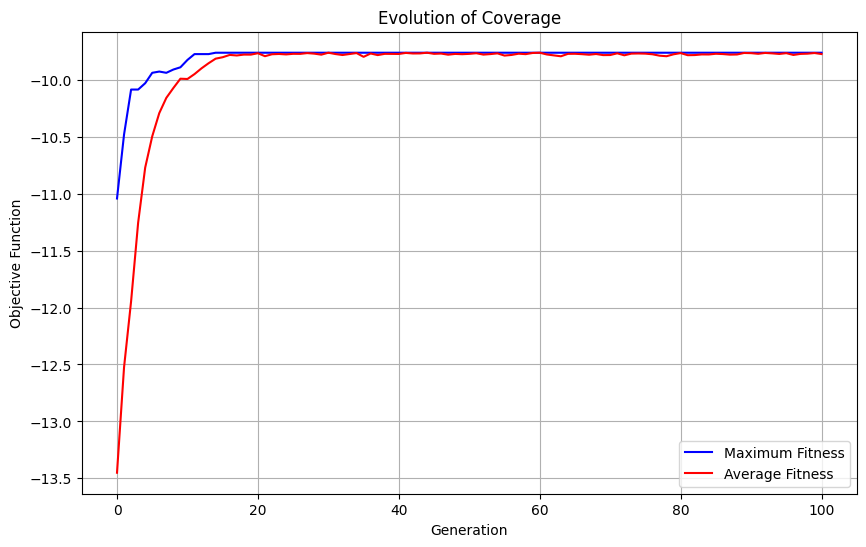

In [22]:
# Visualize the solution
# ga.visualize_solution(sensor_positions)

# Plot evolution progress
gen = logbook.select("gen")
fit_max = logbook.select("max")
fit_avg = logbook.select("avg")

plt.figure(figsize=(10, 6))
plt.plot(gen, fit_max, 'b-', label='Maximum Fitness')
plt.plot(gen, fit_avg, 'r-', label='Average Fitness')
plt.title('Evolution of Coverage')
plt.xlabel('Generation')
plt.ylabel('Objective Function')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
gym_config = OEDGymConfig()
ga_config = GAConfig()

seed = None
ib_config = Burgers2DConfig()
ib_eq = Burgers2D(ib_config)

gym_config.n_sensor = 10
gym_config.n_components_rewards = 4

ga = GA_OED(seed, pde_system=ib_eq, gym_config=gym_config, ga_config=ga_config)

/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/darve/apoorv1/.conda/envs/cs234_a3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [37]:
best_individual, best_fitness, sensor_positions, logbook = ga.run()

gen	nevals	avg      	min        	max     
0  	100   	0.0127918	9.01078e-06	0.116906
1  	84    	0.0261122	4.66302e-05	0.21158 
2  	73    	0.0444338	0.00154783 	0.214888
3  	85    	0.0842702	0.00602653 	0.312299
4  	78    	0.135411 	0.00423063 	0.410509
5  	85    	0.185735 	0.0239887  	0.457057
6  	71    	0.269369 	0.0487825  	0.554729
7  	85    	0.320769 	0.0392371  	0.830816
8  	76    	0.414535 	0.0232232  	0.830816
9  	82    	0.508344 	0.145564   	1.01456 
10 	82    	0.624376 	0.214911   	1.01456 
11 	77    	0.727743 	0.363157   	1.38429 
12 	75    	0.808077 	0.3484     	1.38429 
13 	79    	0.88398  	0.243224   	1.38429 
14 	79    	0.989284 	0.557353   	1.70726 
15 	80    	1.08847  	0.629862   	1.80929 
16 	86    	1.21619  	0.630088   	1.80929 
17 	79    	1.45378  	0.883039   	1.87752 
18 	80    	1.57925  	0.415327   	1.80929 
19 	73    	1.66733  	0.661476   	1.89239 
20 	79    	1.76402  	0.985865   	1.90889 
21 	76    	1.8098   	1.61843    	1.91539 
22 	78    	1.82595  	1.15435    	1

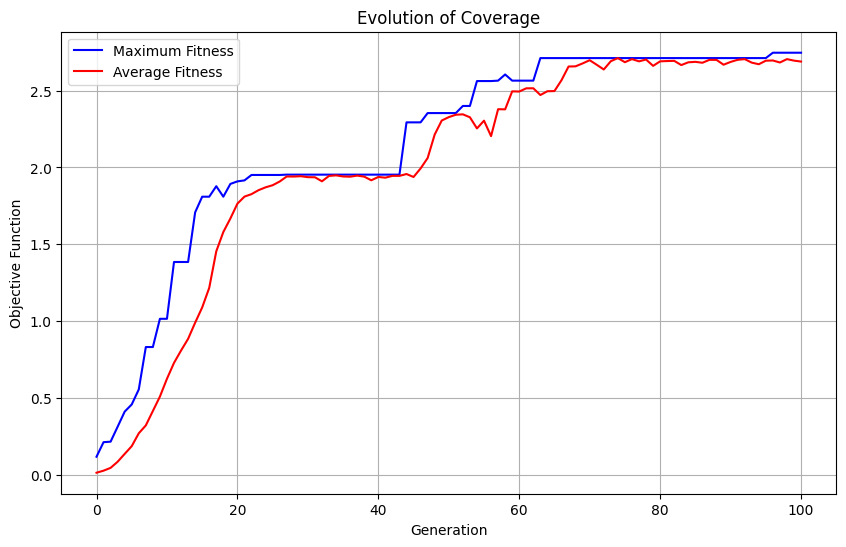

In [38]:
# Visualize the solution
# ga.visualize_solution(sensor_positions)

# Plot evolution progress
gen = logbook.select("gen")
fit_max = logbook.select("max")
fit_avg = logbook.select("avg")

plt.figure(figsize=(10, 6))
plt.plot(gen, fit_max, 'b-', label='Maximum Fitness')
plt.plot(gen, fit_avg, 'r-', label='Average Fitness')
plt.title('Evolution of Coverage')
plt.xlabel('Generation')
plt.ylabel('Objective Function')
plt.legend()
plt.grid(True)
plt.show()